# Two mean simulation

In [1]:
%matplotlib inline
from pylab import *

In [2]:
import random
import numpy as np
import scipy.stats as stats

In [3]:
#define the two samples
#test by using Cushny data
n = 10
sampA = np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])
sampB = np.array([1.9, 0.8, 1.1, 0.1, -0.1, 4.4, 5.5, 1.6, 4.6, 3.4])
meanA, meanB = np.mean(sampA), np.mean(sampB)
obsdif = meanA - meanB
sdA, sdB = np.std(sampA), np.std(sampB)

In [4]:
# Do t test
t, p = stats.ttest_ind(sampA, sampB, equal_var=False, nan_policy='omit')

In [5]:
# Do randomisation
nsim = 100000  #number of re-amplings to run
allobs = np.concatenate([sampA, sampB])
randiff = np.zeros(nsim)
for i in range(nsim):
    random.shuffle(allobs)
    sB = sum(allobs[n : ])
    randiff[i] = (np.sum(allobs) - sB) / float(n) - sB / float(n)

In [6]:
# statistics from randomistaion result
difmean = np.mean(randiff)
difsd = np.std(randiff)
nranlo = randiff[randiff <= obsdif].size 
nranhi = randiff[randiff >= -obsdif].size 
# proportion of values below obs diff
ptoplo = nranlo / nsim
# proportion of values above minus() obs diff)
ptophi = nranhi / nsim
#two-tail P
p2tail = ptoplo + ptophi
lo95lim = np.percentile(randiff, 2.5)
hi95lim = np.percentile(randiff, 97.5)

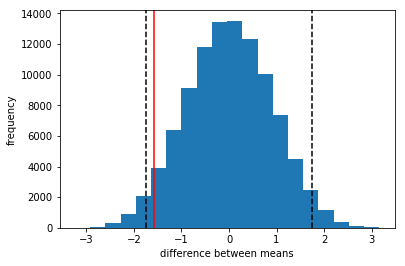

In [7]:
# plot randomisation distribution
plt.hist(randiff, bins=20)
axvline(x=obsdif, color='r')
axvline(x=lo95lim, color='k', linestyle='--')
axvline(x=hi95lim, color='k', linestyle='--')
xlabel('difference between means')
ylabel('frequency');

### Randomisation results

In [8]:
print("number of observations per sample =", n)
print("sample A:", sampA)
print("sample B:", sampB)
print("mean for sample A = {0:.2f}".format(meanA))
print("mean for sample B = {0:.2f}".format(meanB))
print("Observed difference between means (A-B) = {0:.2f}".format(obsdif))
print("SD for sample A = {0:.2f}".format(sdA))
print("SD for sample B = {0:.2f}".format(sdB))
print("\nResult of t test:")
print("\tP value (two-tail) = {0:.3f} and t = {1:.2f}".format(p, t))
print("\nRandomisation distribution:")
print("number of resamplings =", nsim)
print("\tmean = {0:.2f} and SD = {1:.2f}".format(difmean, difsd))
print("\tquantiles (0.025 and 0.975) = {0:.2f} and {1:.2f}".format(lo95lim, hi95lim))
print("\tArea below observed difference = {0:.3f}".format(ptoplo))
print("\tArea above minus observed difference = {0:.3f}".format(ptophi))
print("\tTwo-tailed P value = {0:.3f}".format(p2tail))

number of observations per sample = 10
sample A: [ 0.7 -1.6 -0.2 -1.2 -0.1  3.4  3.7  0.8  0.   2. ]
sample B: [ 1.9  0.8  1.1  0.1 -0.1  4.4  5.5  1.6  4.6  3.4]
mean for sample A = 0.75
mean for sample B = 2.33
Observed difference between means (A-B) = -1.58
SD for sample A = 1.70
SD for sample B = 1.90

Result of t test:
	P value (two-tail) = 0.079 and t = -1.86

Randomisation distribution:
number of resamplings = 100000
	mean = -0.00 and SD = 0.90
	quantiles (0.025 and 0.975) = -1.74 and 1.74
	Area below observed difference = 0.040
	Area above minus observed difference = 0.040
	Two-tailed P value = 0.080
